# <span style='font-family:"Times New Roman"'> <span styel=''> **INTERPRETATION**

*Emile Cohen* 
    
*March 2020*

**Goal:** In this Notebook, we gather code allowin to interpret the cancer panels computed in this section.



---

In [11]:
%run -i '../../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')
from cancer_utils import *
from scipy.stats import fisher_exact, ranksums, chi2, norm
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.gridspec as gridspec

data_path = '../../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [2]:
cohort_type = 'no_wgd'
if cohort_type == 'no_wgd':
    master = non_wgd_load_and_cut(data_path + 'impact-facets-tp53/processed/no_wgd/master_no_wgd.pkl')
    


In [8]:
cancer_type = 'Non-Small Cell Lung Cancer'
mc = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
palette ={'>=1_LOSS':mc[0], 'HOMDEL':mc[1], '1_WILD_TYPE':mc[2], '>1muts':mc[3], '>=1_cnLOH':mc[4], '0_HETLOSS':mc[5]}
palette_res = {'tp53_res':'#2ECC71','tp53_no_res':'#1E8449',  'uncertain':'#7F8C8D'}

palette_list = [mc[5],mc[2],mc[3],mc[4],mc[0],mc[1]]
res_palette_list = ['#2ECC71','#1E8449','#7F8C8D']

group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
res_group_list = ['tp53_res', 'no_tp53_res', 'uncertain']


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128a839d0>)

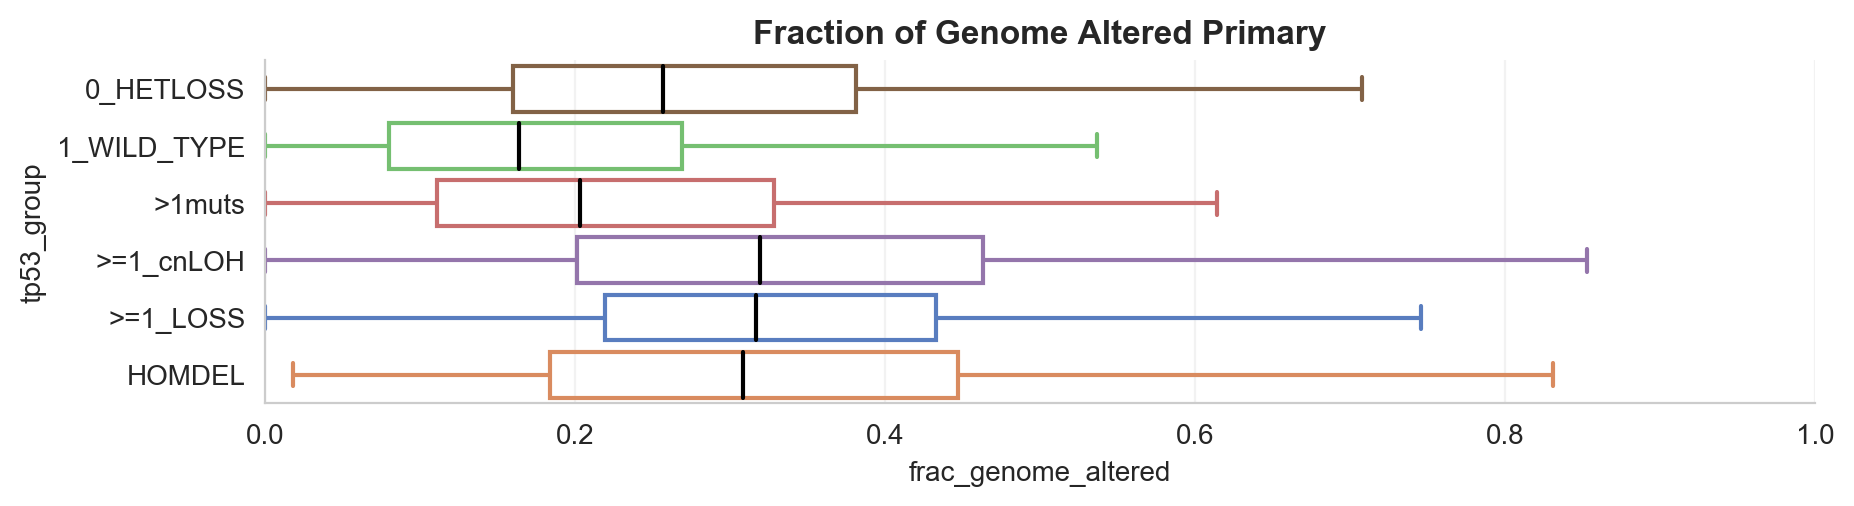

In [13]:
def boxplot_sampletype(df: pd.DataFrame, group:str, palette, order, metrics: str, figsize= (10,3), title: str = '', title_font: int=12, xlim=[0,1]):
    fig=plt.figure(figsize=figsize)
    ax = plt.subplot2grid(shape=(2,1), loc=(0,0), colspan=1)
    
    sns.boxplot(x=metrics, y=group,data=df,ax=ax, dodge=False,order=order, palette=palette).set_title(title, weight='bold', fontsize=title_font)

    style(ax)
    ax.set_xlim(xlim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, ax

boxplot_sampletype(df=master[master['Sample_Type'] == 'Primary'],
                   group='tp53_group', 
                   palette=palette,
                   order=group_list, 
                   metrics='frac_genome_altered', 
                   figsize= (10,5), 
                   title = 'Fraction of Genome Altered Primary', 
                   title_font=12, 
                   xlim=[0,1])



# Comparison Residual Groups

In [4]:
metrics = 'chr_gain'
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
# we remover indeterminate and NA tp53_cn_state samples
master_cancer = master[master['Cancer_Type'] == cancer_type][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

group_1 = master_cancer[master_cancer['tp53_res_group'] == 'tp53_res'][metrics]
group_2 = master_cancer[master_cancer['tp53_res_group'] == 'no_tp53_res'][metrics]

median_1 = group_1.median()
median_2 = group_2.median()

statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)

print('                    size      ' + metrics)
print('median tp53_res:     ' + str(group_1.shape[0]) + '      ' + str(median_1))
print('median no_tp53_res: ' + str(group_2.shape[0]) + '      ' +str(median_2))
print('statistic, p-value: ' + str(statistic) +','+ str(p_value))

NameError: name 'load_clean_up_master' is not defined

# Comparison Subgroups

In [27]:
metrics = 'frac_genome_altered'
cancer_type = 'Breast Cancer'
group_1 = ['>=1_cnLOH']
#group_2 = ['0_HETLOSS', '>1muts', '>=1_LOSS', 'HOMDEL', '1_WILD_TYPE']
group_2 = ['>=1_LOSS']

# we remover indeterminate and NA tp53_cn_state samples
master_cancer = master[master['Cancer_Type'] == cancer_type][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

group_1 = master_cancer[master_cancer['tp53_group'].isin(group_1)][metrics]
group_2 = master_cancer[master_cancer['tp53_group'].isin(group_2)][metrics]

median_1 = group_1.median()
median_2 = group_2.median()

statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)

print('                    size     ' + metrics)
print('median group_1:      ' + str(group_1.shape[0]) + '      ' + str(median_1))
print('median group_2:     ' + str(group_2.shape[0]) + '      ' +str(median_2))
print('statistic, p-value: ' + str(statistic) +','+ str(p_value))

                    size     frac_genome_altered
median group_1:      64      0.4835
median group_2:     500      0.32
statistic, p-value: 5.322357813893674,1.0243084068462597e-07


In [144]:
metrics = 'wgd'
group_1 = ['>=1_cnLOH']
#group_2 = ['0_HETLOSS', '>1muts', '>=1_LOSS', 'HOMDEL', '1_WILD_TYPE']
group_2 = ['>=1_LOSS']
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
# we remover indeterminate and NA tp53_cn_state samples
master_cancer = master[master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

group_1 = master_cancer[master_cancer['tp53_group'].isin(group_1)][metrics]
group_2 = master_cancer[master_cancer['tp53_group'].isin(group_2)][metrics]

statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)

print(group_1[group_1 == 1].shape[0]/group_1.shape[0])
print(group_2[group_2 == 1].shape[0]/group_2.shape[0])
#print('median group_2:     ' + str(group_2.shape[0]) + '      ' +str(median_2))
print('statistic, p-value: ' + str(statistic) +','+ str(p_value))
if p_value <10**(-323): print(True)

0.852112676056338
0.060675883256528416
statistic, p-value: 64.10443361707028,0.0
True


In [98]:
# number of multi mutation events
master_cancer[master_cancer['tp53_count']>1].shape[0]

135

In [99]:
# Proportion of a particular subgroup
group = '0_HETLOSS'
100* master_cancer[master_cancer['tp53_group'] == group].shape[0]/master_cancer[~master_cancer.tp53_group.isna()].shape[0]

15.528255528255528

In [100]:
# Proportion of a particular res_group
res_group = 'tp53_res'
100* master_cancer[master_cancer['tp53_res_group'] == res_group].shape[0]/master_cancer[~master_cancer.tp53_res_group.isna()].shape[0]

24.36023622047244

In [90]:
# Proportion of wgd in a subgroup
res_group = 'tp53_res'

master_group = master_cancer[master_cancer['tp53_res_group'] == res_group]
print(100*master_group[master_group['wgd'] == 1].shape[0]/master_group.shape[0])

1.2429378531073447


In [46]:
# Proportion of LOSS in our subgroups
100* master_cancer[master_cancer['tp53_group'].isin(['0_HETLOSS', '>=1_cnLOH'])].shape[0]/master_cancer[~master_cancer.tp53_group.isna()].shape[0]

70.62146892655367

In [5]:
breast_cancer_clinical = pd.read_csv(data_path + 'cbioportal/raw/Breast_Cancer/breast_msk_2018_clinical_data.tsv', sep='\t')

In [7]:
breast_cancer_clinical.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Disease Free Event,Disease Free (Months),ER PCT Primary,ER Status of Sequenced Sample,ER Status of the Primary,Fraction Genome Altered,HER2 FISH Status of Sequenced Sample,HER2 FISH Ratio Value of Sequenced Sample,HER2 FISH Ratio Primary,HER2 FISH Status (Report and ASCO) of Primary,HER2 IHC Status Primary,HER2 IHC Score of Sequenced Sample,HER2 IHC Status of Sequenced Sample,HER2 IHC Score Primary,HER2 Primary Status,Overall HR Status of Sequenced Sample,Invasive Carcinoma Diagnosis Age,Time to Diagnosis Invasive Carcinoma,Last Communication Contact,Primary Tumor Laterality,Menopausal Status At Diagnosis,Metastatic Disease at Last Follow-up,Metastatic Recurrence Time,Mutation Count,M Stage,NGS Sample Collection Time Period,N Stage,Oncotree Code,Overall Survival (Months),Overall Survival Status,Overall HER2 Status of Sequenced Sample,Overall Patient HER2 Status,Overall Patient HR Status,Overall Patient Receptor Status,Overall Primary Tumor Grade,Primary Nuclear Grade,Prior Breast Primary,Prior Local Recurrence,PR PCT Primary,PR Status of Sequenced Sample,PR Status of the Primary,Receptor Status Primary,Number of Samples Per Patient,Site of Sample,Sample Type,Sex,Stage At Diagnosis,Time To Death (Months),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Patient's Vital Status
0,breast_msk_2018,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.1,70,Positive,Positive,NaN,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,1+,Negative,Positive,37,444.87,14484,Left,Pre,Yes,446.0,4.0,M1,445,N3a,IDC,31.5,LIVING,Negative,Negative,Positive,HR+/HER2-,II Intermediate Grade (Moderately Differentiated),III (High),No,No,22,Positive,Positive,HR+/HER2-,1,Treatment Naive Primary,Primary,Female,IV,NaN,Breast Invasive Ductal Carcinoma,Breast,T1c,Alive
1,breast_msk_2018,P-0000012,P-0000012-T02-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,0,218.0,0,Negative,Negative,0.6891,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,0-1+,Negative,Negative,43,516.48,22336,Right,Pre,No,NaN,1.0,M0,517,N0,IDC,218.0,LIVING,Negative,Negative,Negative,Triple Negative,III High Grade (Poorly Differentiated),III (High),No,No,0,Negative,Negative,Triple Negative,1,Treatment Naive Primary,Primary,Female,IIA,NaN,Breast Invasive Ductal Carcinoma,Breast,T2,Alive
2,breast_msk_2018,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,68.9,90,Positive,Positive,NaN,NaN,NaN,0.7,Negative,Negative,0+,Negative,0+,Negative,Positive,37,449.80,16656,Right,Pre,Yes,519.0,7.0,M0,534,N1mi,IDC,98.0,DECEASED,Negative,Negative,Positive,HR+/HER2-,III High Grade (Poorly Differentiated),II (Intermediate),No,No,30,Positive,Positive,HR+/HER2-,1,Liver,Metastasis,Female,IB,548.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
3,breast_msk_2018,P-0000041,P-0000041-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,90.2,50,Positive,Positive,0.6367,Negative,0.24,NaN,NaN,Positive,2+,Equivocal,3+,Positive,Positive,43,513.68,19364,Left,Pre,Yes,604.0,10.0,M0,618,N0,IDC,123.1,DECEASED,Negative,Positive,Positive,HR+/HER2+,III High Grade (Poorly Differentiated),Unknown,No,No,50,Positive,Positive,HR+/HER2+,1,Breast,Metastasis,Female,IA,637.0,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
4,breast_msk_2018,P-0000057,P-0000057-T01-IM3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,0.5,80,Positive,Positive,0.5093,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,1+,Negative,Positive,38,458.36,15871,Left,Pre,Yes,459.0,5.0,M1,489,NX,MDLC,63.6,DECEASED,Negative,Negative,Positive,HR+/HER2-,II Intermediate Grade (Moderately Differentiated),II (Intermediate),No,No,50,Positive,Positive,HR+/HER2-,1,Post-Treatment Primary,Primary,Female,IV,522.0,Breast Mixed Ductal and Lobular Carcinoma,Breast,TX,Deceased


In [9]:
get_groupby(breast_cancer_clinical,'Cancer Type Detailed', 'count').sort_values(by='count', ascending=False)

,count
Cancer Type Detailed,
Breast Invasive Ductal Carcinoma,1473
Breast Invasive Lobular Carcinoma,299
Breast Mixed Ductal and Lobular Carcinoma,89
"Breast Invasive Cancer, NOS",31
Breast,11
Metaplastic Breast Cancer,9
Adenoid Cystic Breast Cancer,2
Breast Invasive Mixed Mucinous Carcinoma,2
Invasive Breast Carcinoma,2


In [15]:
breast_info = breast_cancer_clinical[['Sample ID', 'ER Status of Sequenced Sample', 'HER2 FISH Status of Sequenced Sample','HER2 IHC Status of Sequenced Sample', 'PR Status of Sequenced Sample','Overall HR Status of Sequenced Sample', 'Receptor Status Primary' ]]

In [16]:
breast_info

,Sample ID,ER Status of Sequenced Sample,HER2 FISH Status of Sequenced Sample,HER2 IHC Status of Sequenced Sample,PR Status of Sequenced Sample,Overall HR Status of Sequenced Sample,Receptor Status Primary
0,P-0000004-T01-IM3,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
1,P-0000012-T02-IM3,Negative,NaN,Negative,Negative,Negative,Triple Negative
2,P-0000015-T01-IM3,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
3,P-0000041-T01-IM3,Positive,Negative,Equivocal,Positive,Positive,HR+/HER2+
4,P-0000057-T01-IM3,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
...,...,...,...,...,...,...,...
1913,P-0018917-T01-IM6,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
1914,P-0018963-T01-IM6,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
1915,P-0019037-T01-IM6,Positive,Negative,Equivocal,Negative,Positive,HR+/HER2-
1916,P-0019054-T01-IM6,Positive,NaN,Negative,Negative,Positive,HR+/HER2-


In [18]:
get_groupby(breast_info, 'Receptor Status Primary', 'count').sort_values(by='count', ascending=False)

,count
Receptor Status Primary,
HR+/HER2-,1422
Triple Negative,174
HR+/HER2+,141
HR-/HER2+,66
HR+/HER2_Unknown,65
Unk/ND,28
HR+/HER2_Equivocal,14
HR-/HER2_Unknown,4
HR-/HER2-,3


In [29]:
master_info = pd.DataFrame(master_cancer['Tumor_Id'], columns= ['Tumor_Id'])
master_info

,Tumor_Id
0,P-0034223-T01-IM6
18,P-0018520-T01-IM6
39,P-0019967-T01-IM6
40,P-0019967-T02-IM6
47,P-0012448-T01-IM5
...,...
29084,P-0034578-T01-IM6
29112,P-0016773-T01-IM6
29157,P-0014938-T01-IM6
29161,P-0030181-T01-IM6


In [34]:
total = pd.merge(master_info, breast_info,how='left',  left_on = 'Tumor_Id', right_on = 'Sample ID')

In [35]:
total

,Tumor_Id,Sample ID,ER Status of Sequenced Sample,HER2 FISH Status of Sequenced Sample,HER2 IHC Status of Sequenced Sample,PR Status of Sequenced Sample,Overall HR Status of Sequenced Sample,Receptor Status Primary
0,P-0034223-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P-0018520-T01-IM6,P-0018520-T01-IM6,Positive,NaN,Negative,Positive,Positive,HR+/HER2-
2,P-0019967-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P-0019967-T02-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P-0012448-T01-IM5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3693,P-0034578-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3694,P-0016773-T01-IM6,P-0016773-T01-IM6,Positive,Negative,Negative,Negative,Positive,HR+/HER2-
3695,P-0014938-T01-IM6,P-0014938-T01-IM6,Positive,Negative,Equivocal,Negative,Positive,HR+/HER2-
3696,P-0030181-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
get_groupby(total, 'Receptor Status Primary', 'count').sort_values(by='count', ascending=False)

,count
Receptor Status Primary,
HR+/HER2-,918
Triple Negative,94
HR+/HER2+,71
HR+/HER2_Unknown,38
HR-/HER2+,22
Unk/ND,18
HR+/HER2_Equivocal,5
HR-/HER2-,2
HR-/HER2_Unknown,2


In [113]:
master[master['wgd'] == 1]['frac_genome_altered'].median()

0.859

In [112]:
master[master['wgd'] == -1]['frac_genome_altered'].median()

0.234

In [108]:
master_cancer[master_cancer['tp53_res_group'] == 'no_tp53_res'][master_cancer['wgd'] == -1].frac_genome_altered.median()

0.408

In [109]:
master_cancer[master_cancer['tp53_res_group'] == 'tp53_res'][master_cancer['wgd'] == -1].frac_genome_altered.median()

0.2885

In [200]:
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
# we remover indeterminate and NA tp53_cn_state samples
master = master[master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]


In [151]:
master[master['wgd'] == 1][master['tp53_res_group'] == 'no_tp53_res'].shape[0]/master[master['wgd'] == 1][~master.tp53_res_group.isna()].shape[0]

0.8894141829393628

In [184]:
g1 = master[master['wgd'] == -1][master['tp53_group'] == '0_HETLOSS'].chr_loss
g2 = master[master['wgd'] == -1][master['tp53_group'].isin(['>=1_cnLOH', '>=1_LOSS', '>1muts'])].chr_loss

median1 = g1.median()
median2 = g2.median()

statistic, p_value = ranksums(g1.dropna().values,g2.dropna().values)

print(median1, median2)
print( statistic, p_value)

5.0 6.0
-6.587858874781112 4.462144635203384e-11


In [172]:
master[master['wgd'] == -1][~master['tp53_res_group'].isna()].chr_gain.median()

2.0

In [199]:
master[master['wgd'] == -1][(master['tp53_count']>=1) | (master['tp53_cn_state'] != 'DIPLOID')].shape[0]/master[master['wgd'] == -1].shape[0]

0.5260205851740488

In [188]:
master.shape[0]

25255

In [191]:
master[master['tp53_count'] == 0]

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Sample_Type,purity,ploidy,samples_per_patient,Overall Survival Status,Overall Survival (Months),MSI Score,TMB_Score,Patient_Current_Age,Sex,Ethnicity_Category,Race_Category,mutationStatus,Somatic_Status,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,tp53_cf,wgd,mutation_count,gene_count,driver_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_residual_1,tp53_residual_2,tp53_residual_3,tp53_residual_4,tp53_residual_5,tp53_first_group,tp53_group,tp53_res_group,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5
0,P-0034223-T01-IM6_P-0034223-N01-IM6,P-0034223-T01-IM6,P-0034223,Breast Cancer,Invasive Breast Carcinoma,Metastasis,0.941111,2.241830,1.0,LIVING,NaN,0.55,5.3,63.0,Female,NaN,NO VALUE ENTERED,SOMATIC,Matched,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2.0,1.0,1.0,80668592.0,DIPLOID,1.000000,-1,6,6.0,0,0.901899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILD_TYPE,None,None,3,2,2,0,0.08,None,None,None,None,None
1,P-0009819-T01-IM5_P-0009819-N01-IM5,P-0009819-T01-IM5,P-0009819,Prostate Cancer,Prostate Adenocarcinoma,Primary,0.275237,2.681075,1.0,LIVING,23.441,0.00,1.0,72.0,Male,Non-Spanish; Non-Hispanic,NO VALUE ENTERED,SOMATIC,Matched,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2.0,1.0,1.0,80668300.0,DIPLOID,1.000000,-1,1,1.0,0,0.148014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILD_TYPE,None,None,4,4,0,0,0.137,None,None,None,None,None
4,P-0006554-T01-IM5_P-0006554-N01-IM5,P-0006554-T01-IM5,P-0006554,Glioma,Anaplastic Oligodendroglioma,Primary,0.715208,1.910719,1.0,LIVING,26.170,1.30,46.2,55.0,Female,Non-Spanish; Non-Hispanic,WHITE,SOMATIC,Matched,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2.0,1.0,1.0,40254480.0,DIPLOID,1.000000,-1,47,39.0,0,0.706897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILD_TYPE,None,None,5,4,1,0,0.173,None,None,None,None,None
5,P-0036980-T01-IM6_P-0036980-N01-IM6,P-0036980-T01-IM6,P-0036980,Hepatobiliary Cancer,Intrahepatic Cholangiocarcinoma,Primary,0.845207,2.267573,1.0,LIVING,9.501,0.45,4.4,54.0,Female,Non-Spanish; Non-Hispanic,WHITE,SOMATIC,Matched,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2.0,1.0,1.0,80668381.0,DIPLOID,1.000000,-1,5,5.0,0,0.814815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILD_TYPE,None,None,4,4,1,0,0.187,None,None,None,None,None
7,P-0001315-T01-IM3_P-0001315-N01-IM3,P-0001315-T01-IM3,P-0001315,Gastrointestinal Stromal Tumor,Gastrointestinal Stromal Tumor,Metastasis,0.924595,2.076282,2.0,LIVING,65.030,2.33,6.7,42.0,Male,Non-Spanish; Non-Hispanic,WHITE,SOMATIC,Matched,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2.0,1.0,1.0,30178359.0,DIPLOID,1.000000,-1,6,5.0,0,0.902778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILD_TYPE,None,None,10,5,3,2,0.356,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [203]:
get_groupby(master[~master.tp53_group.isna()], 'tp53_cn_state', 'count').sort_values(by='count', ascending=False)

,count
tp53_cn_state,
HETLOSS,6364
LOSS BEFORE,3086
DIPLOID,1159
CNLOH BEFORE & LOSS,886
CNLOH,808
HOMDEL,272
LOSS BEFORE & AFTER,220
LOSS AFTER,173
CNLOH BEFORE,162


In [42]:
def boxplot_sampletype(df: pd.DataFrame, metrics: str, figsize= (10,3), title: str = '',tp53_metrics=False, title_font: int=12, xlim=[0,1], continuous= False):
    fig=plt.figure(figsize=figsize)
    ax = plt.subplot2grid(shape=(2,1), loc=(0,0), colspan=1)
    

    groupby = get_groupby(df, 'tp53_loh_status', 'count')

    if tp53_metrics:
        groupby= get_groupby(df[~df[metrics + '_1'].isna()], 'tp53_loh_status', 'count')
        data_1 =  pd.DataFrame(df[['Tumor_Id', metrics + '_1']])
        data_1.columns = ['Tumor_Id', metrics]
        data_2 = pd.DataFrame(df[['Tumor_Id', metrics + '_2']])
        data_2.columns = ['Tumor_Id', metrics]
        data_3 = pd.DataFrame(df[['Tumor_Id', metrics + '_3']])
        data_3.columns = ['Tumor_Id', metrics]
        data_4 = pd.DataFrame(df[['Tumor_Id', metrics + '_4']])
        data_4.columns = ['Tumor_Id', metrics]
        data_5 = pd.DataFrame(df[['Tumor_Id', metrics + '_5']])
        data_5.columns = ['Tumor_Id', metrics]
        data_tot = data_1.append(data_2)
        data_tot = data_tot.append(data_3)
        data_tot = data_tot.append(data_4)
        data_tot = data_tot.append(data_5)

        df = pd.merge(left=data_tot, right=df[['Tumor_Id','tp53_cn_state', 'tp53_tcn', 'tp53_loh_status']],how='left', left_on='Tumor_Id',right_on='Tumor_Id')

    if continuous: sns.violinplot(x=metrics, y='loh_status',data=df,ax=ax, dodge=False,order=loh_list, palette=palette_loh).set_title(title, weight='bold', fontsize=title_font)
    else: sns.boxplot(y=metrics, x='tp53_loh_status',data=df,ax=ax, dodge=False,order=loh_list, palette=palette_loh).set_title(title, weight='bold', fontsize=title_font)

    '''try:
        ax.set_yticklabels(['Primary (' + str(int(groupby.loc['Primary'])) + ')',
                            'Metastasis (' + str(int(groupby.loc['Metastasis'])) + ')'], 
                            fontsize=10)
    except: pass
    '''
    style(ax)
    ax.set_ylim(xlim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, ax

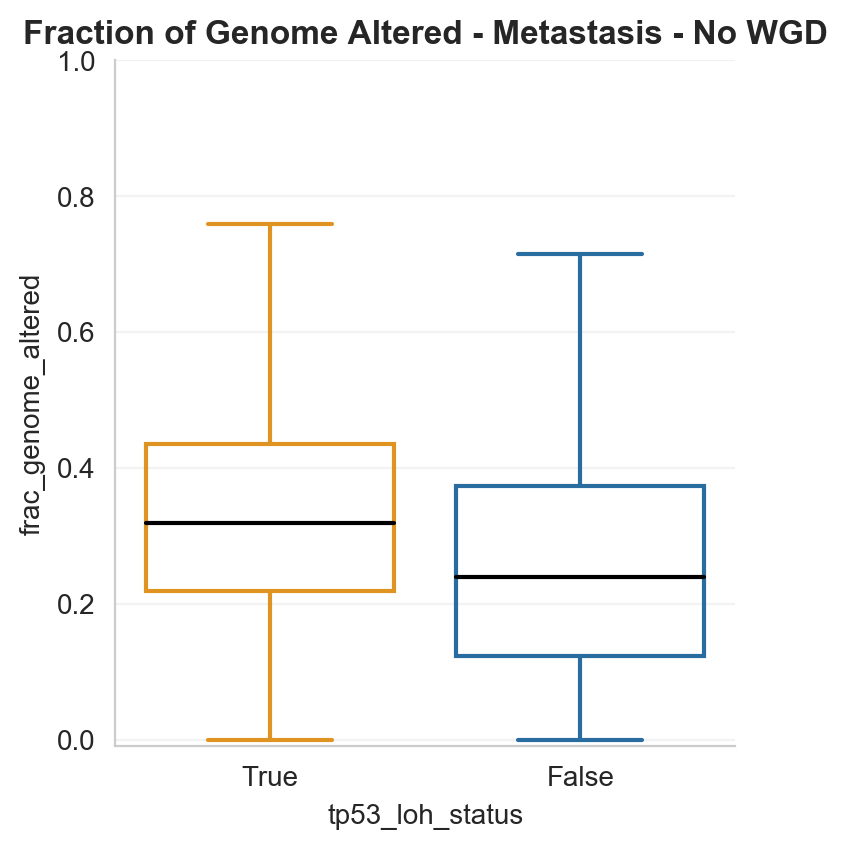

In [52]:
master_gi = master[master['Sample_Type'] == 'Metastasis'][~master.tp53_group.isna()]
fig, ax = boxplot_sampletype(master_gi, 'frac_genome_altered', figsize= (4,10), title='Fraction of Genome Altered - Metastasis - No WGD', title_font=12, xlim=[-0.01,1])

In [53]:
def get_statistics(df: pd.DataFrame, group:str, metrics: str, group_list: list):
    group_1 = df[df[group] == group_list[0]][metrics]
    group_2 = df[df[group] == group_list[1]][metrics]

    median_1 = group_1.median()
    median_2 = group_2.median()

    statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)
    
    results = [['', 'size', metrics],
               [group_list[0], group_1.shape[0], median_1],
               [group_list[1], group_2.shape[0], median_2],
               ['', 'Statistics', 'p-value'],
               ['', statistic, p_value]]


    return pd.DataFrame(results)


display(get_statistics(df=master_gi,
               group='tp53_loh_status',
               metrics='frac_genome_altered', 
               group_list=[True, False]))

,0,1,2
0,,size,frac_genome_altered
1,True,2847,0.319
2,False,259,0.239
3,,Statistics,p-value
4,,6.72613,1.74239e-11


In [54]:
get_groupby(master_gi, 'tp53_group', 'count').sum()

count    3106
dtype: int64

In [20]:
get_groupby(master[master['tp53_group'] == '>1muts'], 'tp53_res_group', 'count')

,count
tp53_res_group,
no_tp53_res,315
tp53_res,109


In [23]:
get_groupby(master, 'tp53_cn_state', 'count')#.sum()

,count
tp53_cn_state,
AMP,11
AMP (BALANCED),3
CNLOH,813
CNLOH & GAIN,46
DIPLOID,8292
GAIN,281
HETLOSS,5896
HOMDEL,139
TETRAPLOID,34


In [25]:
master[master['tp53_cn_state'] == 'DIPLOID'][master['tp53_count'] == 0]

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Patient_Current_Age,Sample_Type,purity,ploidy,Overall_Survival_Months,Overall_Survival_Status,MSI_Score,MSI_Type,TMB_Score,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,tp53_cf,wgd,gene_count,mutation_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_res_1,tp53_res_2,tp53_res_3,tp53_res_4,tp53_res_5,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5,tp53_first_group,tp53_group,tp53_res_group,loh_status,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered
0,P-0034223-T01-IM6_P-0034223-N01-IM6,P-0034223-T01-IM6,P-0034223,Breast Cancer,Invasive Breast Carcinoma,63.0,Metastasis,0.946448,2.241830,NaN,LIVING,0.55,Stable,5.3,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668592,DIPLOID,1.0,False,6,6,0.901899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,3.0,2.0,2.0,0.0,0.080
1,P-0009819-T01-IM5_P-0009819-N01-IM5,P-0009819-T01-IM5,P-0009819,Prostate Cancer,Prostate Adenocarcinoma,72.0,Primary,0.278140,2.681075,23.441,LIVING,0.00,Stable,1.0,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668300,DIPLOID,1.0,False,1,1,0.148014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,4.0,4.0,0.0,0.0,0.137
3,P-0006554-T01-IM5_P-0006554-N01-IM5,P-0006554-T01-IM5,P-0006554,Glioma,Anaplastic Oligodendroglioma,55.0,Primary,0.775152,1.910719,26.170,LIVING,1.30,Stable,46.2,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,40254480,DIPLOID,1.0,False,39,47,0.706897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,5.0,4.0,1.0,0.0,0.173
4,P-0036980-T01-IM6_P-0036980-N01-IM6,P-0036980-T01-IM6,P-0036980,Hepatobiliary Cancer,Intrahepatic Cholangiocarcinoma,54.0,Primary,0.845207,2.267573,9.501,LIVING,0.45,Stable,4.4,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668381,DIPLOID,1.0,False,5,5,0.814815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,4.0,4.0,1.0,0.0,0.187
5,P-0001315-T01-IM3_P-0001315-N01-IM3,P-0001315-T01-IM3,P-0001315,Gastrointestinal Stromal Tumor,Gastrointestinal Stromal Tumor,42.0,Metastasis,0.934522,2.093267,65.030,LIVING,2.33,Stable,6.7,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,30178359,DIPLOID,1.0,False,5,6,0.902778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,10.0,5.0,3.0,2.0,0.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16022,P-0050663-T01-IM6_P-0050663-N01-IM6,P-0050663-T01-IM6,P-0050663,Ovarian Cancer,Clear Cell Ovarian Cancer,34.0,Primary,0.365540,2.401595,0.329,LIVING,0.05,Stable,2.6,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0

In [29]:
arm_level_nowgd = pd.read_csv(data_path + 'impact-facets-tp53/processed/no_wgd/' + 'arm_level_nowgd.txt', sep='\t').drop('Unnamed: 0', axis=1)
master = non_wgd_load_and_cut(data_path + 'impact-facets-tp53/processed/no_wgd/master_no_wgd.pkl')

In [38]:
pd.DataFrame(master[master['tp53_group'] == '>=1_cnLOH'][['Sample_Id','chr_cnloh', 'tp53_cn_state', 'tp53_count']])

,Sample_Id,chr_cnloh,tp53_cn_state,tp53_count
23,P-0019967-T01-IM6_P-0019967-N01-IM6,4.0,CNLOH,1
57,P-0005091-T01-IM5_P-0005091-N01-IM5,2.0,CNLOH,1
111,P-0032859-T02-IM6_P-0032859-N01-IM6,2.0,CNLOH,1
212,P-0019392-T01-IM6_P-0019392-N01-IM6,2.0,CNLOH,1
259,P-0009204-T01-IM5_P-0009204-N01-IM5,0.0,CNLOH,1
...,...,...,...,...
15842,P-0048849-T01-IM6_P-0048849-N01-IM6,3.0,CNLOH,1
15843,P-0048941-T01-IM6_P-0048941-N01-IM6,1.0,CNLOH,1
15957,P-0050392-T01-IM6_P-0050392-N01-IM6,2.0,CNLOH,1
15975,P-0050452-T01-IM6_P-0050452-N01-IM6,1.0,CNLOH,1


In [36]:
arm_level_nowgd[arm_level_nowgd['sample'] == 'P-0019967-T01-IM6_P-0019967-N01-IM6']

,sample,arm,tcn,lcn,cn_length,arm_length,frac_of_arm,cn_state
884,P-0019967-T01-IM6_P-0019967-N01-IM6,1p,1,0,120534257,120534257,1.00,HETLOSS
885,P-0019967-T01-IM6_P-0019967-N01-IM6,1q,1,0,125713816,125713816,1.00,HETLOSS
886,P-0019967-T01-IM6_P-0019967-N01-IM6,2p,2,1,89410282,89591153,1.00,DIPLOID
887,P-0019967-T01-IM6_P-0019967-N01-IM6,2q,2,0,119969472,119969472,1.00,CNLOH
888,P-0019967-T01-IM6_P-0019967-N01-IM6,3p,1,0,78984700,80230454,0.98,HETLOSS
889,P-0019967-T01-IM6_P-0019967-N01-IM6,3q,2,1,106857860,106857860,1.00,DIPLOID
890,P-0019967-T01-IM6_P-0019967-N01-IM6,4p,1,0,48257537,48257537,1.00,HETLOSS
891,P-0019967-T01-IM6_P-0019967-N01-IM6,4q,1,0,140602483,140602483,1.00,HETLOSS
892,P-0019967-T01-IM6_P-0019967-N01-IM6,5p,1,0,46375261,46375261,1.00,HETLOSS
893,P-0019967-T01-IM6_P-0019967-N01-IM6,5q,1,0,134121817,134121817,1.00,HETLOSS
